In [62]:
%load_ext autoreload
%autoreload 2
from funcs import readin, show_adj_matrix, obj_function, adjmatrix2adjmap
import numpy as np

from itertools import chain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
S, A, W = readin('data/test1.txt')
N = A.shape[0]
A1 = np.zeros(A.shape)
W[0,1]

5

In [19]:
weightmap = adjmatrix2adjmap(W)
adjmap    = adjmatrix2adjmap(A)


# sorted(weightmap.keys(), key=weightmap.get, reverse=True)

In [61]:
edges_by_weight = sorted(weightmap.keys(), key=weightmap.get, reverse=True)
splexes = {i:{i} for i in range(N)}
A1 = np.zeros(A.shape)

for e in edges_by_weight:
    if A[e] == 0:
        continue
    i,j = e
    # we try to merge splex in i and j
    s_i = splexes[i]
    s_j = splexes[j]

    print(i,j)
    print(s_i, s_j)
    print(A1[i].sum(), A1[j].sum())
    if s_i is s_j:
        # if they're already in same plex just add back the edge
        A1[e] = 1
        A1.T[e] = 1
        print('Add', i, j)
    elif len(s_i) + len(s_j) <= (S + 1):
        # if they are less than S+1 they are always a legit s-plex
        A1[e] = 1
        A1.T[e] = 1
        splexes[i] = s_i | s_j # union
        for k in chain(s_i, s_j):
            splexes[k] = splexes[i]
        print('Add', i, j)
    # else:
    #     min_edges = len(s_i) + len(s_j) - S
    #     A1[e] = 1
    #     A1[e[1], e[0]] = 1
    #     f_delta = W[e]

    #     for k in chain(s_i, s_j):
    #         edges_k = A1[k].sum()
    #         dif = min_edges - edges_k
    #         if dif == 1:
    #             f_delta += W[k,i] * (A[k,i]*2-1) # Add if already in W or subtract otherwise
    #         elif dif > 1:
    #             break
    #     else:
    #         A1[e] = 0
    #         A1[e[1], e[0]] = 0
    #         print('Refuse', i, j)
    #         continue
    #     print('Add3', i, j)
    #     splexes[i] = s_i | s_j # union

    #     for k in chain(s_i, s_j):
    #         splexes[k] = splexes[i]

splexes

3 4
{3} {4}
0.0 0.0
Add 3 4
0 1
{0} {1}
0.0 0.0
Add 0 1
2 3
{2} {3, 4}
0.0 1.0
Add 2 3
1 2
{0, 1} {2, 3, 4}
1.0 1.0
0 3
{0, 1} {2, 3, 4}
1.0 2.0
2 4
{2, 3, 4} {2, 3, 4}
1.0 1.0
Add 2 4
4 5
{2, 3, 4} {5}
2.0 0.0
4 6
{2, 3, 4} {6}
2.0 0.0
5 6
{5} {6}
0.0 0.0
Add 5 6
5 7
{5, 6} {7}
1.0 0.0
Add 5 7
6 8
{5, 6, 7} {8}
1.0 0.0
7 8
{5, 6, 7} {8}
1.0 0.0


{0: {0, 1},
 1: {0, 1},
 2: {2, 3, 4},
 3: {2, 3, 4},
 4: {2, 3, 4},
 5: {5, 6, 7},
 6: {5, 6, 7},
 7: {5, 6, 7},
 8: {8}}

In [60]:
A1 == A1.T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

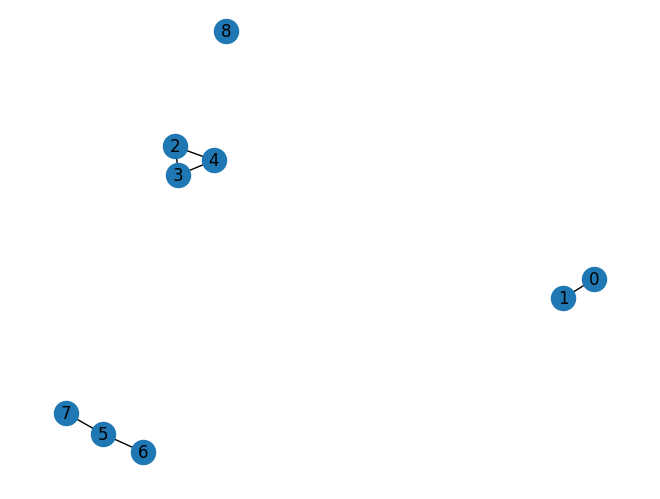

14

In [55]:
show_adj_matrix(A1)
obj_function(A,A1,W)